In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [2]:
def displayData(X):
    
    num_plots = int(np.size(X,0)**.5)
    fig, ax = plt.subplots(num_plots,num_plots,sharex=True,sharey=True)
    img_num = 0
    for i in range(num_plots):
        for j in range(num_plots):
            # Convert column vector into 20x20 pixel matrix
            # transpose
            img = X[img_num,:].reshape(20,20).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1

    return (fig, ax)

In [3]:
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   

print('Loading and Visualizing Data ...\n')
data = sio.loadmat('ex4data1.mat')
X=data['X']
y=data['y']
m = X.shape[0]

rand_indices = np.random.permutation(m) # shuffle number 
sel = X[rand_indices[0:100]] # choose first 100 number 

# digit_grid,ax = displayData(sel) # display diagram 
# digit_grid.show()  

Loading and Visualizing Data ...



In [4]:
# ================ Part 2: Loading Parameters ================
    
print('\nLoading Saved Neural Network Parameters ...\n')
data = sio.loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']

nn_params = np.concatenate((Theta1.T.reshape(Theta1.size,1), Theta2.reshape(Theta2.size,1)), axis=0)
lamb = 0;



Loading Saved Neural Network Parameters ...



In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [6]:
def sigmoidGradient(z):
    g = sigmoid(z)* (1-sigmoid(z))
    return g

In [7]:
# # print(Theta1.shape)
# T1 = nn_params[:(hidden_layer_size*(input_layer_size+1))].reshape((input_layer_size+1),hidden_layer_size).T
# # print(T1 == Theta1)
# print(Theta2.shape)
# T2 = nn_params[-(num_labels*(hidden_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))
# print(T2==Theta2)

In [8]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    m = X.shape[0]

    X = np.c_[np.ones(m),X]
    J=0
    Theta1 = nn_params[:(hidden_layer_size*(input_layer_size+1))].reshape((input_layer_size+1),hidden_layer_size).T
    Theta2 = nn_params[-(num_labels*(hidden_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))
#     print("Theta1 shape ", Theta1.shape)
#     print("Theta2 shape ", Theta2.shape)
#     print("X shape ", X.shape)
    a1 = sigmoid(X.dot(Theta1.T)) # X = 5000* 401 , Theta1.T =401*25 a1= 5000*25
    assert(a1.shape==(X.shape[0],Theta1.shape[0]))
    a1 = np.c_[np.ones(m), a1] # add ones in a1 so a1.shape = 5000*26
    h= sigmoid(a1.dot(Theta2.T)) # a1=5000*26 and Theta2 =10*26 so h = 5000*10
    assert(h.shape == (a1.shape[0],Theta2.shape[0]))
    for i in range(1,num_labels+1):
        yk = (y==i)*1
        
        h_of_x = (h[:,i-1].reshape(-1,1))
        J = J - (np.sum((yk*np.log(h_of_x)) + ((1-yk)*np.log(1-h_of_x))))/m
    
    
    rtheta1=np.sum(np.square(Theta1[:,1:]))
    rtheta2=np.sum(np.square(Theta2[:,1:]))
    bias = lamb/(2*m)
    J= J+(bias*(rtheta1+rtheta2));
    Del1=0
    Del2=0
    for t in range(1,m+1):
        A1 = X[t-1:t].T
        Z2 = Theta1.dot(A1)
        a = np.array([1]).reshape(-1,1)
        A2 = np.concatenate((a,sigmoid(Z2)), axis=0)
        Z3 = Theta2.dot(A2)
        H = sigmoid(Z3)
        actual = y[t-1];
        yk= np.zeros((num_labels,1))
        yk[actual-1] = 1;
        del3 = H - yk;
        del2 =(Theta2[:,1:].T.dot(del3)) * sigmoidGradient(Z2)
        Del1 = Del1 + del2 * A1.T
        Del2 = Del2 + del3 * A2.T

    Theta1_grad = (Del1/m) + (lamb/m) * np.concatenate((np.zeros((hidden_layer_size,1)),Theta1[:,1:]), axis=1)
    Theta2_grad = (Del2/m) + (lamb/m) *  np.concatenate((np.zeros((num_labels,1)), Theta2[:,1:]), axis=1)

    grad = np.concatenate((Theta1_grad.T.reshape(Theta1_grad.size,1), Theta2_grad.reshape(Theta2_grad.size,1)), axis=0)  
    grad = grad.reshape(-1)
   
    return J,grad


In [9]:
J,grad=nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb)


print('Cost at parameters (loaded from ex4weights):{} \n(this value should be about 0.287629)'.format(J));


Cost at parameters (loaded from ex4weights):0.2876291651613189 
(this value should be about 0.287629)


In [10]:
#=============== Part 4: Implement Regularization ===============

print('\nChecking Cost Function (w/ Regularization) ... \n')

lamb = 1;

J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y, lamb)

print('Cost at parameters (loaded from ex4weights): {} \n(this value should be about 0.383770)'.format(J));


Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.38376985909092365 
(this value should be about 0.383770)


In [11]:
# ================ Part 5: Sigmoid Gradient  ================

print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1 ,-0.5, 0, 0.5, 1]) );
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(g);
print('\n\n');


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]





In [12]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12;
    W = np.random.rand(L_out,1+L_in)*2*epsilon_init-epsilon_init
    return W

In [13]:
np.random.seed(0)
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)


initial_nn_params = np.concatenate((initial_Theta1.T.reshape(initial_Theta1.size,1), initial_Theta2.reshape(initial_Theta2.size,1)))

# print(initial_nn_params.shape)
# print(initial_nn_params)

In [14]:
def debugInitializeWeights(fan_out, fan_in):
    w=np.zeros((fan_out,fan_in+1))
    w=np.array([np.sin(w) for w in range(1,np.size(w)+1)]).reshape(w.shape[1],w.shape[0]).T
    
    return w

In [15]:
# x1=debugInitializeWeights(5,3)
# print(x1)

In [16]:
def computeNumericalGradient(J, theta):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4;
    for p in range(len(theta)):
        perturb[p] = e
        loss1 = J(theta - perturb);
        loss2 = J(theta + perturb);
        numgrad[p] = (loss2 - loss1) / (2*e);
        perturb[p] = 0;
    return numgrad

In [17]:
def checkNNGradients(lamb=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
#     print(Theta1)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    X  = debugInitializeWeights(m, input_layer_size - 1)
#     t = [i for i in range(1,m+1)]
    y = np.mod([i for i in range(1,m+1)],num_labels).reshape(-1,1) +1
  
    nn_params = np.concatenate((Theta1.T.reshape(Theta1.size,1), Theta2.T.reshape(Theta2.size,1)))
#     print(Theta1)
#     print(Theta2)
#     print(nn_params)
    
    cost, grad = nnCostFunction(nn_params,input_layer_size,hidden_layer_size, num_labels, X, y, lamb)
    
    def reduced_cost_func(p):
        return nnCostFunction(p,input_layer_size,hidden_layer_size,num_labels,
                          X,y,lamb)[0]
    
 
    numgrad = computeNumericalGradient(reduced_cost_func,nn_params)
    print(np.c_[numgrad, grad])
    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad);
    print(diff)
    return


In [18]:
checkNNGradients()

[[ 0.18224256  0.18224256]
 [ 0.0591135   0.0591135 ]
 [-0.08086345 -0.08086345]
 [-0.18751164 -0.18751164]
 [-0.08160758 -0.08160758]
 [ 0.00738798  0.00738798]
 [-0.01101324 -0.01101324]
 [ 0.00930873  0.00930873]
 [-0.01666321 -0.01666321]
 [ 0.01760371  0.01760371]
 [ 0.03932262  0.03932262]
 [ 0.02289973  0.02289973]
 [-0.00269066 -0.00269066]
 [-0.0373132  -0.0373132 ]
 [-0.02494044 -0.02494044]
 [ 0.01492069  0.01492069]
 [ 0.02400482  0.02400482]
 [-0.01083521 -0.01083521]
 [-0.00450548 -0.00450548]
 [-0.03175303 -0.03175303]
 [ 0.44140153  0.44140153]
 [ 0.32576013  0.32576013]
 [ 0.2884691   0.2884691 ]
 [ 0.21041122  0.21041122]
 [ 0.12341796  0.12341796]
 [ 0.14080393  0.14080393]
 [ 0.2496489   0.2496489 ]
 [ 0.14604166  0.14604166]
 [ 0.15616904  0.15616904]
 [ 0.12971082  0.12971082]
 [ 0.10914671  0.10914671]
 [ 0.09013237  0.09013237]
 [ 0.24535195  0.24535195]
 [ 0.14687039  0.14687039]
 [ 0.14566906  0.14566906]
 [ 0.14562146  0.14562146]
 [ 0.10137001  0.10137001]
 

In [19]:
lamb = 3;
checkNNGradients(lamb);


[[ 0.18224256  0.18224256]
 [ 0.0591135   0.0591135 ]
 [-0.08086345 -0.08086345]
 [-0.18751164 -0.18751164]
 [-0.08160758 -0.08160758]
 [-0.16026132 -0.16026132]
 [ 0.38317872  0.38317872]
 [ 0.60292368  0.60292368]
 [ 0.23060788  0.23060788]
 [-0.30880895 -0.30880895]
 [-0.56067151 -0.56067151]
 [-0.29904402 -0.29904402]
 [ 0.24940956  0.24940956]
 [ 0.55705122  0.55705122]
 [ 0.36523226  0.36523226]
 [-0.1578213  -0.1578213 ]
 [-0.55283368 -0.55283368]
 [-0.46142755 -0.46142755]
 [ 0.08542085  0.08542085]
 [ 0.51601412  0.51601412]
 [ 0.44140153  0.44140153]
 [ 0.87133858  0.87133858]
 [ 0.3731411   0.3731411 ]
 [-0.24367028 -0.24367028]
 [-0.4519366  -0.4519366 ]
 [-0.02684537 -0.02684537]
 [ 0.2496489   0.2496489 ]
 [ 0.73965661  0.73965661]
 [ 0.40344013  0.40344013]
 [-0.19670184 -0.19670184]
 [-0.49084741 -0.49084741]
 [-0.23181138 -0.23181138]
 [ 0.24535195  0.24535195]
 [ 0.74123481  0.74123481]
 [ 0.53584176  0.53584176]
 [-0.02712053 -0.02712053]
 [-0.47546848 -0.47546848]
 

In [20]:
lamb=3.0
debug_J,grad  = nnCostFunction(nn_params, input_layer_size,hidden_layer_size, num_labels, X, y, lamb);

print('Cost at (fixed) debugging parameters (w/ lambda = {}):{} \n(for lambda = 3, this value should be about 0.576051)\n\n'.format(lamb, debug_J))

Cost at (fixed) debugging parameters (w/ lambda = 3.0):0.5760512469501331 
(for lambda = 3, this value should be about 0.576051)




In [21]:
lamb = 1;

def reduced_cost_func(p):
    return nnCostFunction(p,input_layer_size,hidden_layer_size,num_labels,
                          X,y,lamb)

results = minimize(reduced_cost_func,
                   initial_nn_params,
                   method="CG",
                   jac=True,
                   options={'maxiter':50, "disp":True})


         Current function value: 0.452688
         Iterations: 50
         Function evaluations: 113
         Gradient evaluations: 113


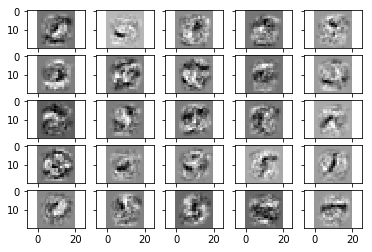

In [22]:
displayData(Theta1[:,1:]);


In [23]:
def predict(Theta1, Theta2, X):
    X = np.c_[np.ones(m),X]
    a1 = sigmoid(X.dot(Theta1.T))
    k = a1.shape[0]
    a2 = np.c_[np.ones(k),a1]
    a3= sigmoid(a2.dot(Theta2.T))
#     max_value=a3.max(axis=1)
    index = a3.argmax(axis=1)
    p=np.c_[index]
    return p


In [24]:
pred = predict(Theta1, Theta2, X);
print(np.mean((pred+1)==y)*100)

97.52


In [25]:
m=5
num_labels = 3;

t = [i for i in range(1,m+1)]
print(np.mod(t,num_labels).reshape(-1,1))

[[1]
 [2]
 [0]
 [1]
 [2]]


In [26]:
w=np.zeros((5,4))
print(np.array([np.sin(w) for w in range(1,np.size(w)+1)]).reshape(w.shape[0],w.shape[1]))

[[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825]
 [ 0.41211849 -0.54402111 -0.99999021 -0.53657292]
 [ 0.42016704  0.99060736  0.65028784 -0.28790332]
 [-0.96139749 -0.75098725  0.14987721  0.91294525]]


In [27]:

a = np.random.rand(3,5)
b= np.random.rand(5,3)
print(a)
print(b)


# print(nn)

[[0.37142028 0.88655434 0.37860413 0.01931643 0.14493369]
 [0.34620824 0.1663522  0.82298146 0.99873161 0.33416302]
 [0.48518635 0.04761817 0.19446411 0.22906051 0.38748291]]
[[0.82641661 0.39921027 0.74142861]
 [0.52858989 0.6636492  0.19722378]
 [0.03881181 0.24667046 0.10123266]
 [0.70266819 0.56922552 0.79368845]
 [0.40259639 0.26049217 0.86104086]]


In [28]:

nn = np.concatenate((a.T.reshape(a.size,1), b.T.reshape(b.size,1)))
# print(nn)
x = nn [-15:].reshape(5,3)

print(x)

[[0.82641661 0.52858989 0.03881181]
 [0.70266819 0.40259639 0.39921027]
 [0.6636492  0.24667046 0.56922552]
 [0.26049217 0.74142861 0.19722378]
 [0.10123266 0.79368845 0.86104086]]
